In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings("ignore")

# Explore and Cleaning of Data

In [31]:
cols=['ID', 'Topic', 'Sentiment', 'Text']
df=pd.read_csv(r"C:\Prodigy Infotech\archive (4)\twitter_training.csv",names=cols)

In [32]:
df.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [34]:
df.isna().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [35]:
df.dropna(inplace=True)

Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: Sentiment, dtype: int64


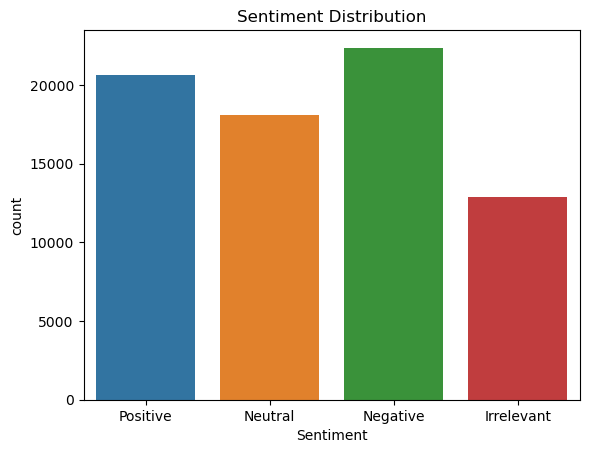

In [36]:
print(df['Sentiment'].value_counts())
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

# Perform Sentiment Analysis

In [37]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores

# Apply the function to the 'Text' column
df['Sentiment_Scores'] = df['Text'].apply(get_sentiment)

# Extract compound scores for simplicity
df['Compound'] = df['Sentiment_Scores'].apply(lambda score_dict: score_dict['compound'])

# Classify sentiment based on compound score
df['Sentiment_Pred'] = df['Compound'].apply(lambda c: 'Positive' if c >= 0.05 else ('Negative' if c <= -0.05 else 'Neutral'))

# Display the first few rows to see the new columns
print(df.head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                                    Sentiment_Scores  Compound Sentiment_Pred  
0  {'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...   -0.6908       Negative  
1  {'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...   -0.6908       Negative  
2  {'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...   -0.6908       Negative  
3  {'neg': 0.37, 'neu': 0.63, 'pos': 0.0, 'compou...   -0.6908       Negative  
4  {'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...   -0.

# Visualize the results

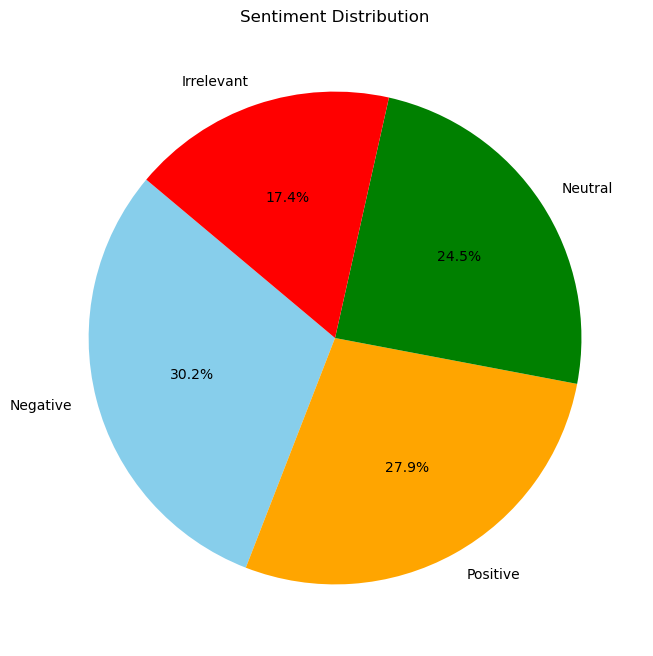

In [51]:
# Calculate the counts for each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])

plt.title('Sentiment Distribution')

# Show the plot
plt.show()

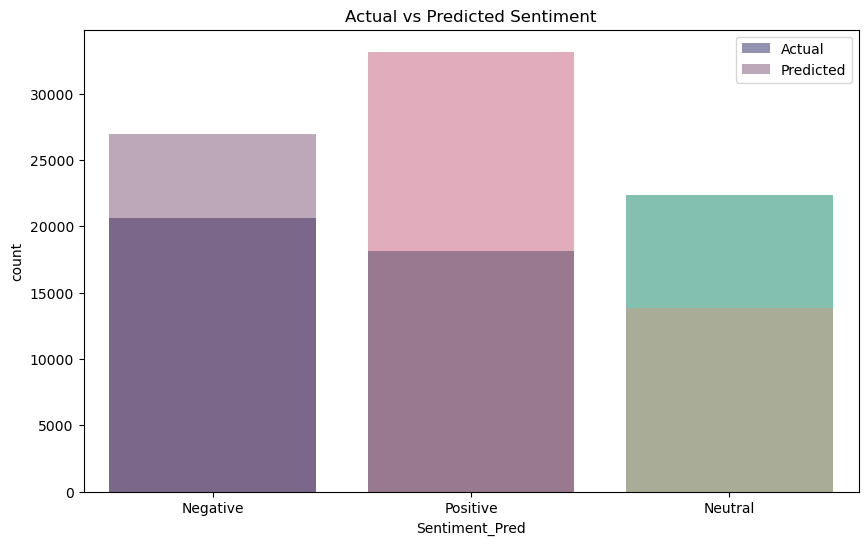

In [38]:
# Compare actual sentiment with predicted sentiment
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis', alpha=0.6, label='Actual')
sns.countplot(x='Sentiment_Pred', data=df, palette='rocket', alpha=0.4, label='Predicted')
plt.title('Actual vs Predicted Sentiment')
plt.legend()
plt.show()

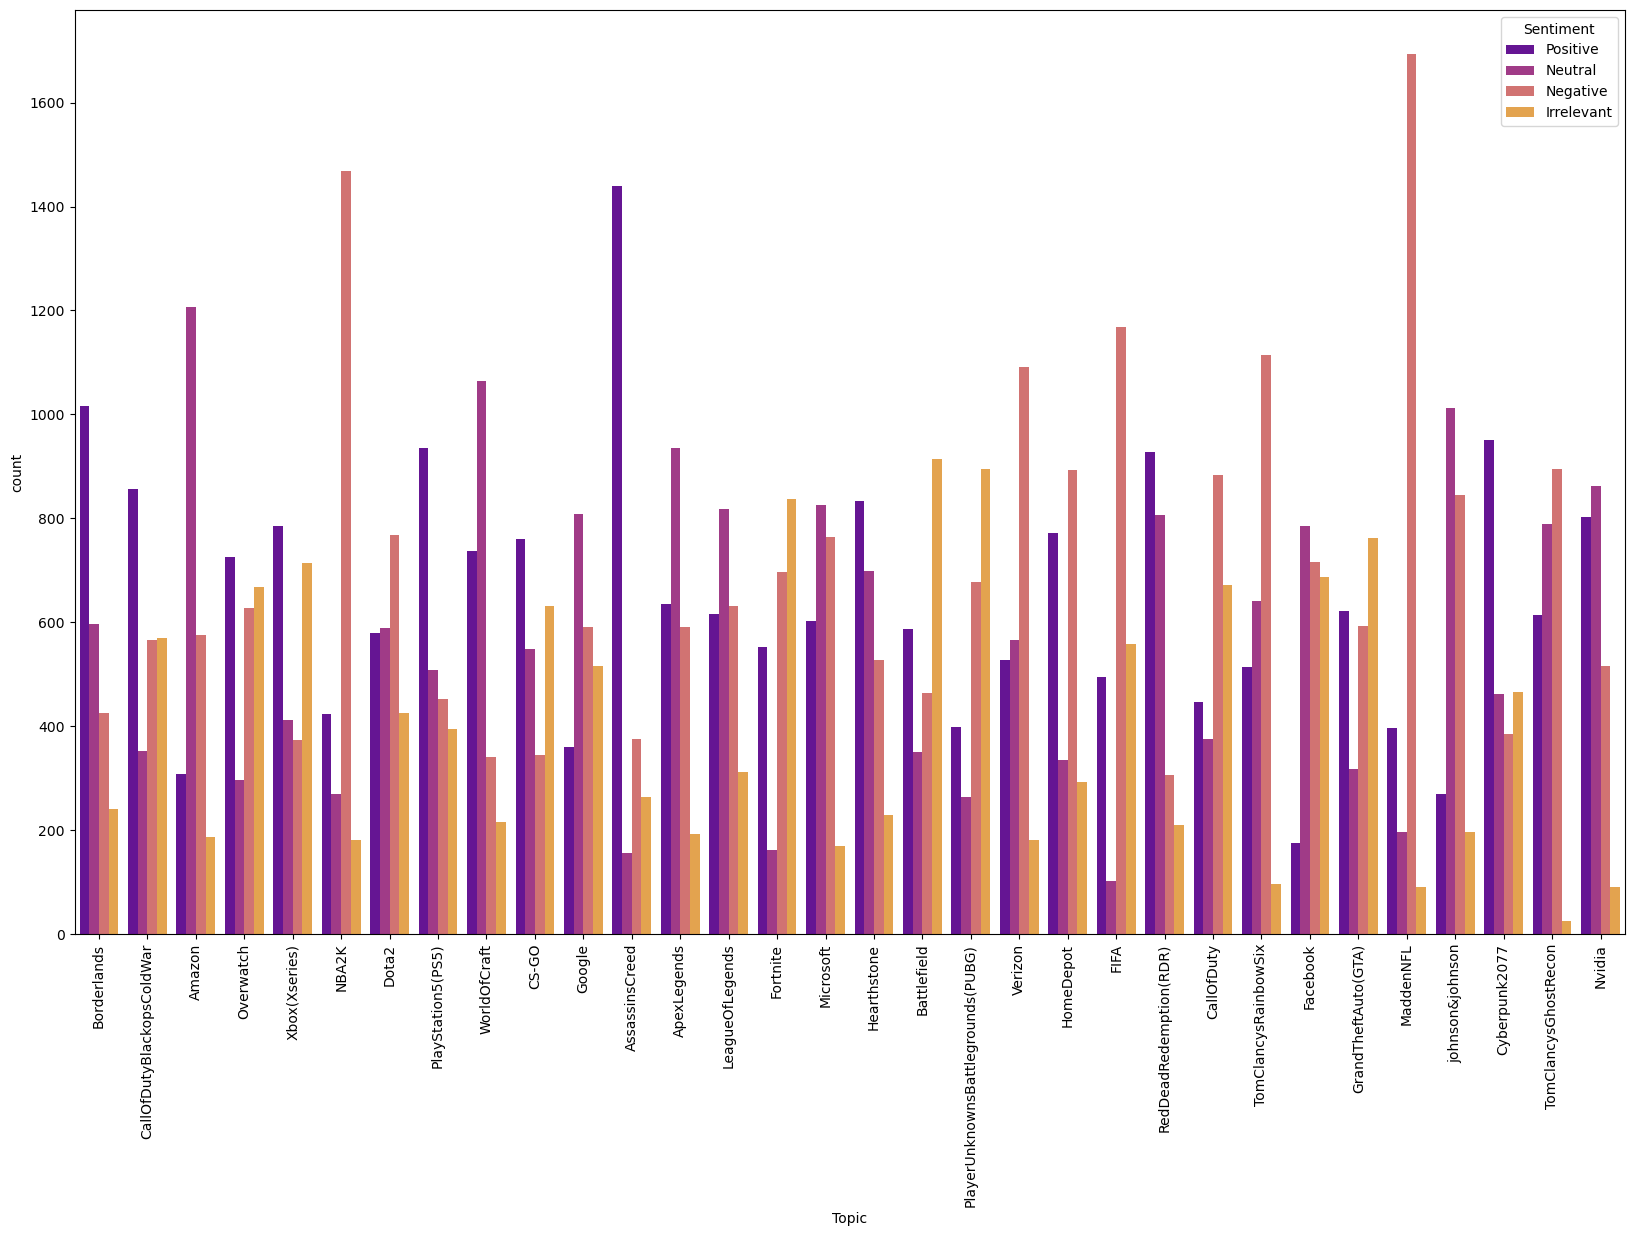

In [54]:
plt.figure(figsize=(20,12))
sns.countplot(x='Topic',data=df,palette='plasma',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

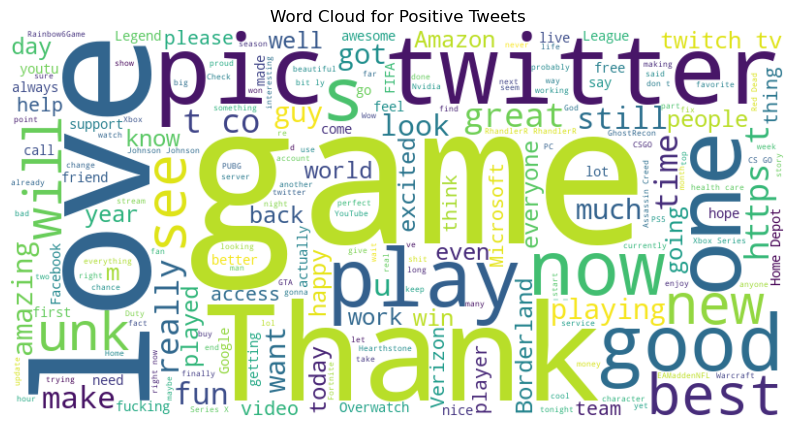

In [39]:
# Word Cloud for positive tweets
positive_tweets = ' '.join(df[df['Sentiment_Pred'] == 'Positive']['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Tweets')
plt.axis('off')
plt.show()

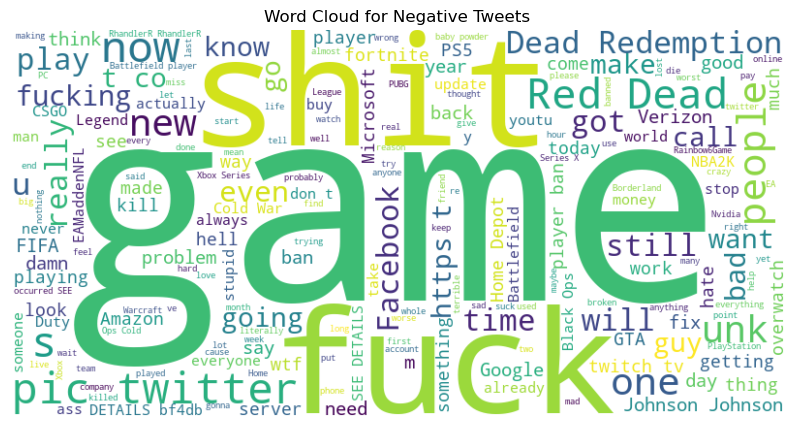

In [40]:
# Word Cloud for negative tweets
negative_tweets = ' '.join(df[df['Sentiment_Pred'] == 'Negative']['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Tweets')
plt.axis('off')
plt.show()

In [57]:
## Group by Topic and Sentiment
topic_wise_sentiment = df.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Topics
topic_counts = df['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

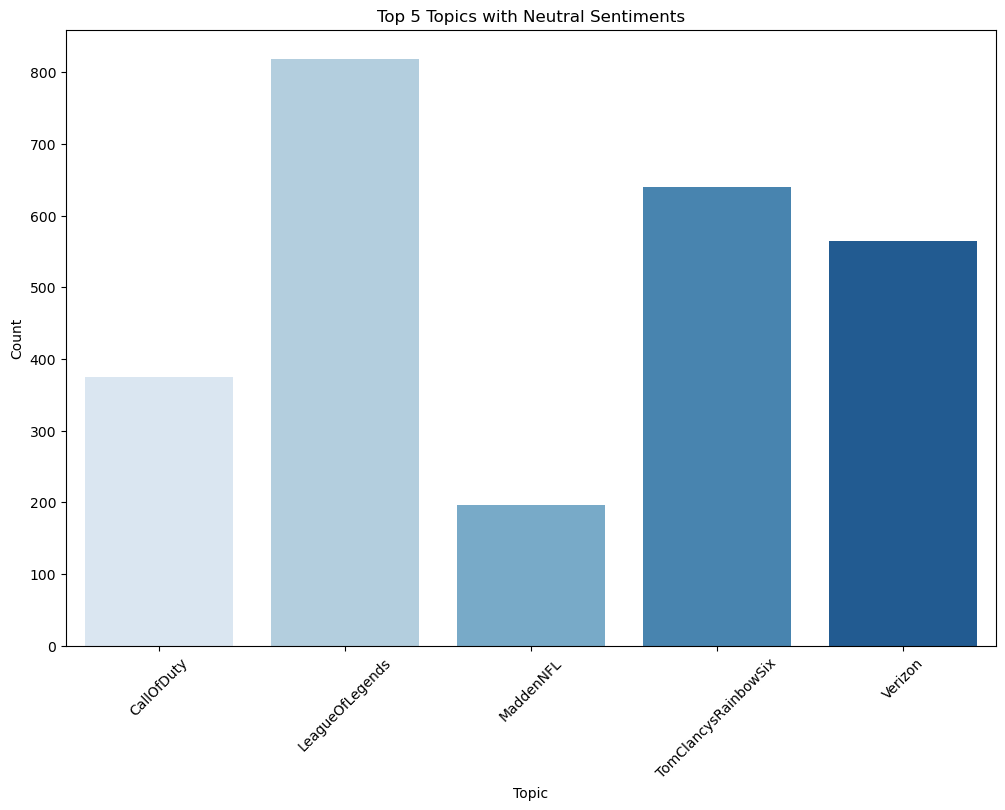

In [58]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count', palette='Blues')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

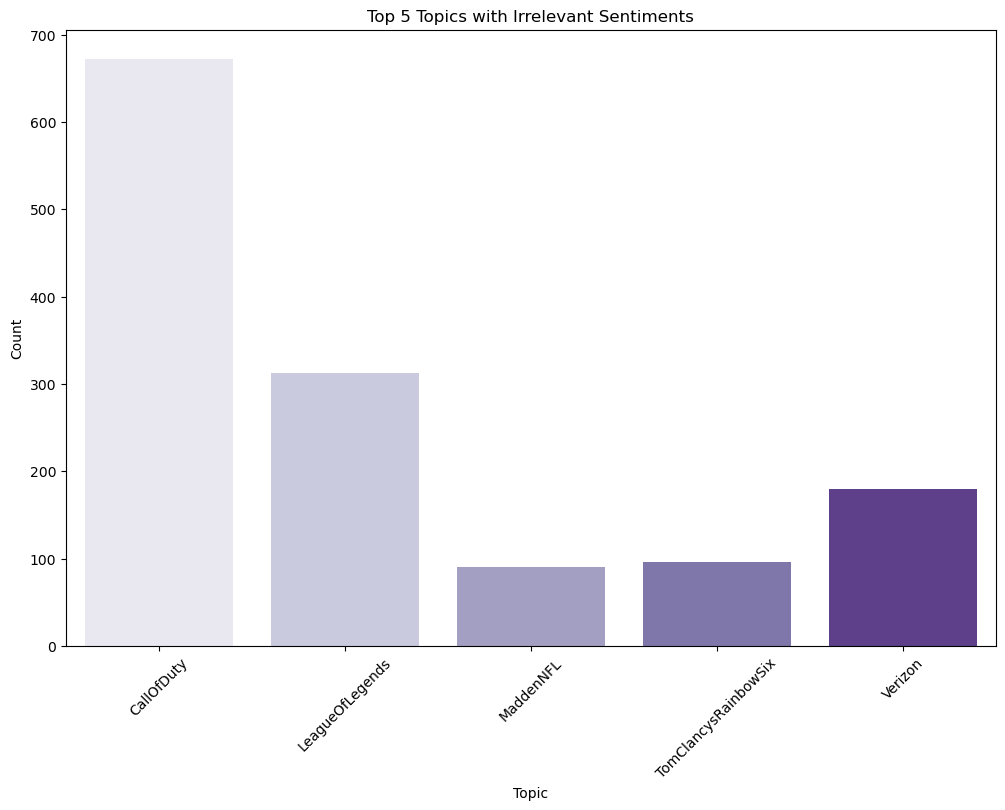

In [59]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', palette='Purples')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

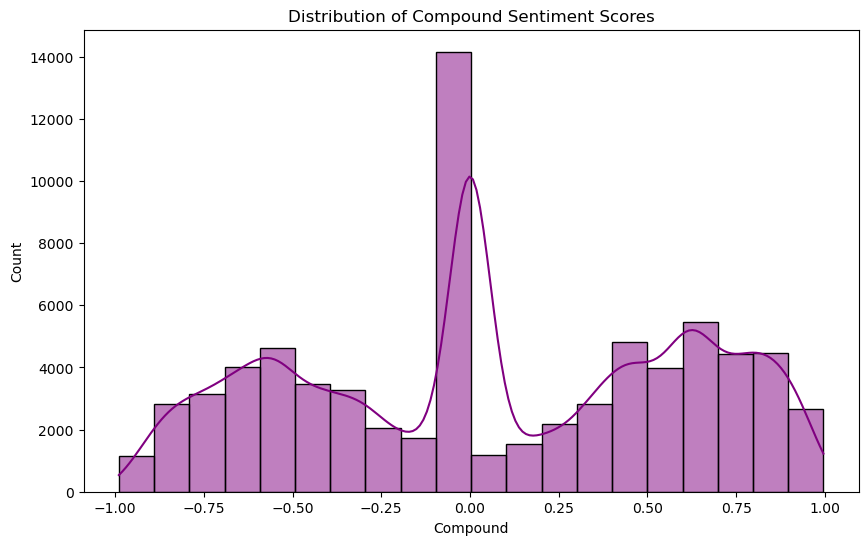

In [41]:
# Distribution of compound scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Compound'], bins=20, kde=True, color='purple')
plt.title('Distribution of Compound Sentiment Scores')
plt.show()

# More Detailed Sentiment Analysis

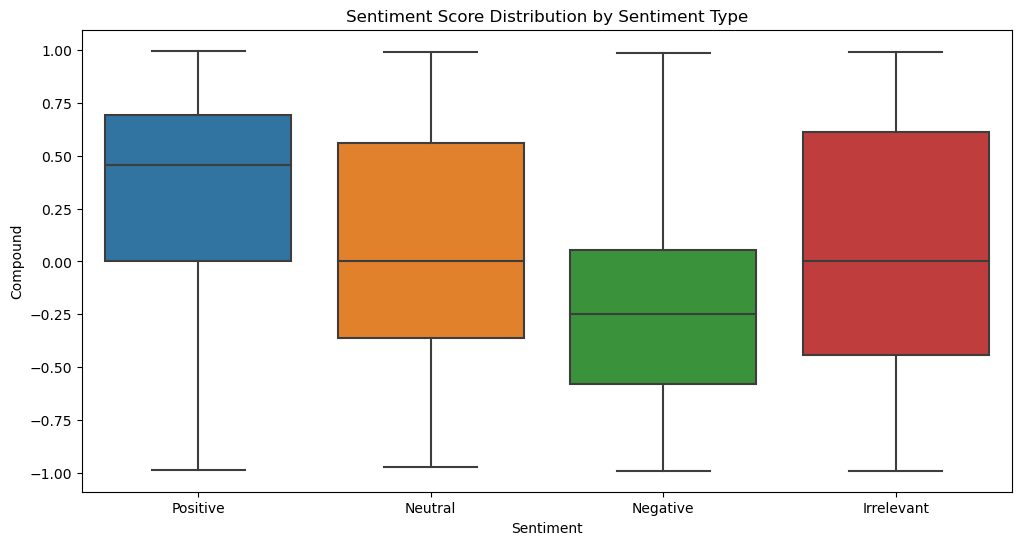

In [43]:
# Detailed sentiment score distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sentiment', y='Compound', data=df)
plt.title('Sentiment Score Distribution by Sentiment Type')
plt.show()

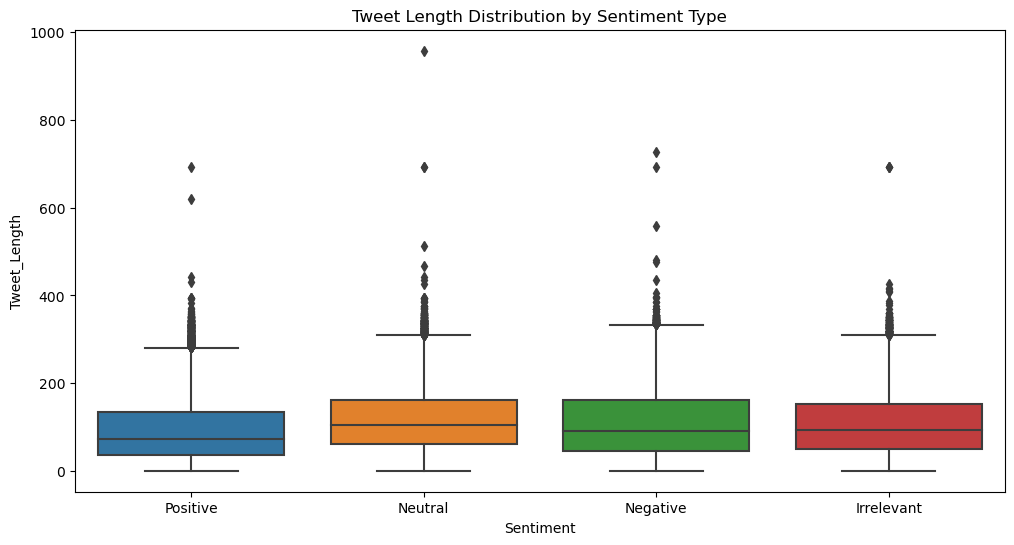

In [44]:
# Relationship between tweet length and sentiment
df['Tweet_Length'] = df['Text'].apply(len)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sentiment', y='Tweet_Length', data=df)
plt.title('Tweet Length Distribution by Sentiment Type')
plt.show()

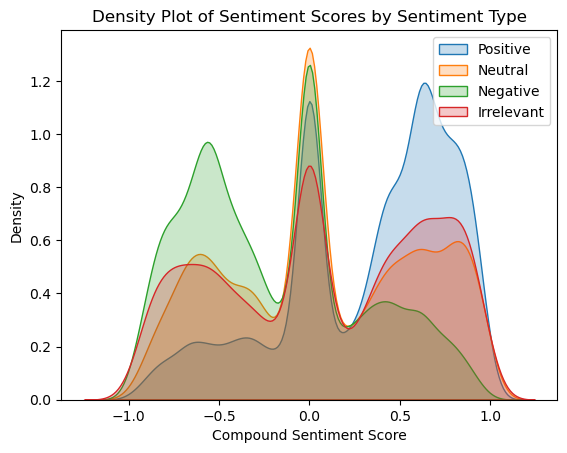

In [45]:
# Distribution of sentiment scores by category
for sentiment in df['Sentiment'].unique():
    sns.kdeplot(df[df['Sentiment'] == sentiment]['Compound'], shade=True, label=sentiment)
plt.title('Density Plot of Sentiment Scores by Sentiment Type')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Density')
plt.legend()
plt.show()

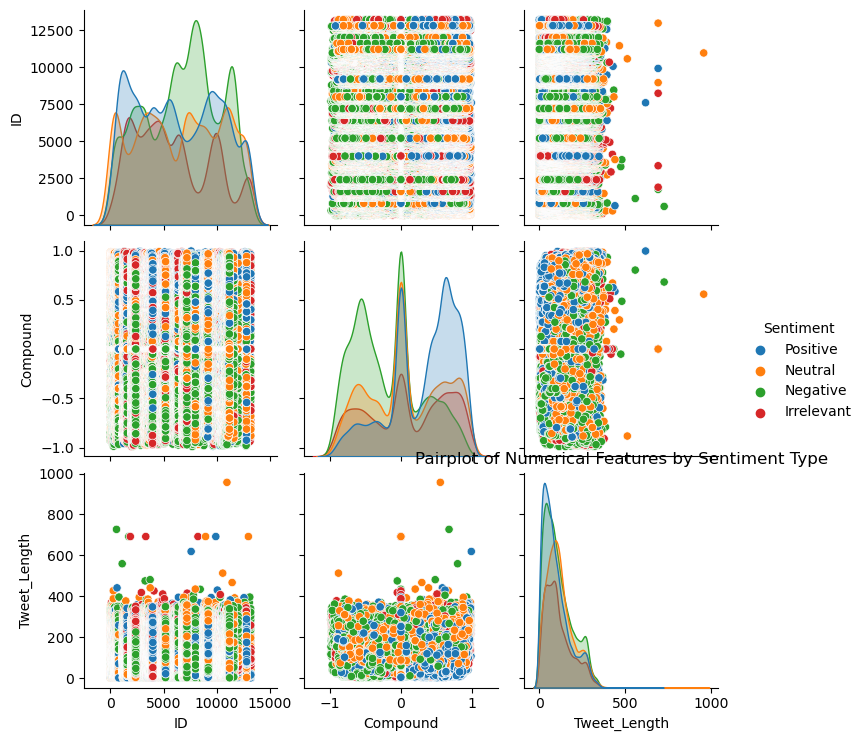

In [47]:
# Pairplot for numerical features
sns.pairplot(df, hue='Sentiment')
plt.title('Pairplot of Numerical Features by Sentiment Type')
plt.show()

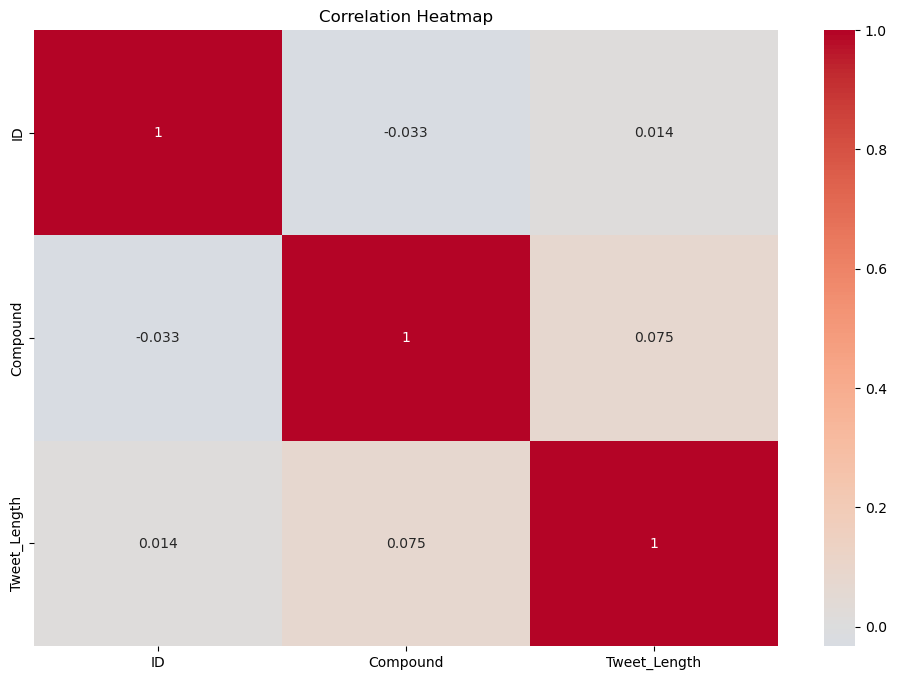

In [48]:
# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

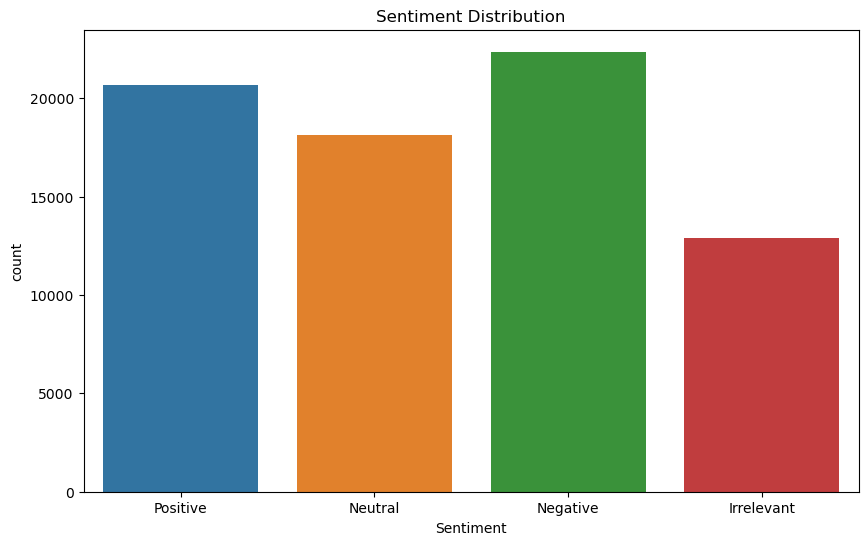

In [49]:
# Save a plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.savefig('sentiment_distribution.png')
plt.show()